In [50]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import widgets, interact

# Step 1: Read the CSV
file_path = '/Users/johnmcenroe/Documents/programming_misc/real_estate/data/processed/scraped_dublin/added_metadata/scraped_property_results_Dublin_final_with_metadata_deduped.csv'
df = pd.read_csv(file_path)

### Step 2: Clean the 'Asking Price' column (Remove currency symbols, commas, etc.)
# Remove any non-numeric characters (commas, currency symbols)
df['Asking Price'] = df['Asking Price'].replace({'[^0-9.]': ''}, regex=True)

### Convert 'Asking Price' and 'MyHome_Floor_Area_Value' to Numeric
df['Asking Price'] = pd.to_numeric(df['Asking Price'], errors='coerce')  # Convert to numeric, invalid values become NaN
df['MyHome_Floor_Area_Value'] = pd.to_numeric(df['MyHome_Floor_Area_Value'], errors='coerce')  # Convert to numeric

### Safe Division: Add Square Metres (Handling NaNs and Division by Zero)
def safe_divide(row):
    if pd.isna(row['Asking Price']) or pd.isna(row['MyHome_Floor_Area_Value']) or row['MyHome_Floor_Area_Value'] == 0:
        return None  # Return None if the value is NaN or the denominator is zero
    else:
        return row['Asking Price'] / row['MyHome_Floor_Area_Value']

# Apply the safe divide function to the DataFrame
df['price_per_square_meter'] = df.apply(safe_divide, axis=1)

# Step 3: Display the DataFrame
df.head(3)  # Displays the first few rows


,Address,Asking Price,Beds,Baths,Property Type,Energy Rating,Eircode,Local Property Tax,Agency Name,Agency Contact,...,MyHome_Address,MyHome_Asking_Price,MyHome_Beds,MyHome_Baths,MyHome_Floor_Area_Value,MyHome_BER_Rating,MyHome_Latitude,MyHome_Longitude,MyHome_Link,price_per_square_meter
0,"Taramar, Middle Third, Dublin 5, D05X8N9",750000,4 Bed,1 Bath,End of Terrace,E2,D05 X8N9,€765,Hamill Estate Agents & Valuers,Hamill Estate Agents & Valuers,...,"Taramar, Middle Third, Killester, Dublin 5",Sold,4 beds,NaN,142.0,NaN,53.373857,-6.203371,https://www.myhome.ie/residential/brochure/tar...,5281.690141
1,"87 Haddington Road, Dublin 4, D04WP23",990000,5 Bed,3 Bath,Terrace,SI_666,D04 WP23,"€1,035",Turley Property Advisors,Susan Turley,...,"87 Haddington Road, Ballsbridge, Dublin 4",Sold,5 beds,3 baths,175.0,NaN,53.335385,-6.239842,https://www.myhome.ie/residential/brochure/87-...,5657.142857
2,"Apartment 79, The Northumberlands, Love Lane E...",410000,2 Bed,1 Bath,Apartment,C1,D02 X068,€405,Owen Reilly,Owen Reilly Sales,...,"79 The Northumberlands, Love Lane East, Mount ...",Sold,2 beds,NaN,64.0,NaN,53.349805,-6.260310,https://www.myhome.ie/residential/brochure/79-...,6406.250000


In [51]:
import pandas as pd

# Subset of columns, ensuring column name is consistent
columns_subset = ['Address', 'Asking Price', 'Beds', 'Baths', 'Property Type',
                  'Energy Rating', 'Eircode', 'Agency Name', 
                  'MyHome_Latitude', 'MyHome_Longitude', 'price_per_square_meter',
                  'Price Changes', 'MyHome_Floor_Area_Value']

# Subsetting the DataFrame
df_subset = df[columns_subset]

# Filtering rows where 'price_per_square_metre' is greater than 0 (ensure consistent spelling)
df_filtered = df_subset[df_subset['price_per_square_meter'] > 0]

# Display the filtered DataFrame
df_filtered
df = df_filtered
df.head()


,Address,Asking Price,Beds,Baths,Property Type,Energy Rating,Eircode,Agency Name,MyHome_Latitude,MyHome_Longitude,price_per_square_meter,Price Changes,MyHome_Floor_Area_Value
0,"Taramar, Middle Third, Dublin 5, D05X8N9",750000,4 Bed,1 Bath,End of Terrace,E2,D05 X8N9,Hamill Estate Agents & Valuers,53.373857,-6.203371,5281.690141,"Sold, €950,000, Fri Sep 13 2024; Sale Agreed, ...",142.0
1,"87 Haddington Road, Dublin 4, D04WP23",990000,5 Bed,3 Bath,Terrace,SI_666,D04 WP23,Turley Property Advisors,53.335385,-6.239842,5657.142857,"Sold, €1,010,000, Fri Sep 13 2024; Sale Agreed...",175.0
2,"Apartment 79, The Northumberlands, Love Lane E...",410000,2 Bed,1 Bath,Apartment,C1,D02 X068,Owen Reilly,53.349805,-6.260310,6406.250000,"Sold, €480,000, Fri Sep 13 2024; Sale Agreed, ...",64.0
3,"7 Parkside Heath, Clongriffin, Dublin 13, Dubl...",535000,3 Bed,3 Bath,Terrace,A3,D13 WN3C,Sherry FitzGerald Sutton,53.407653,-6.163418,4734.513274,"Sold, €569,000, Fri Sep 13 2024; Unlisted, €53...",113.0
4,"5 Herbert Road, Blanchardstown, Blanchardstown...",400000,2 Bed,1 Bath,Bungalow,D2,D15 A3TN,Lloyd Daly & Associates Ltd.,53.387605,-6.374562,3448.275862,"Sold, €432,200, Fri Sep 13 2024; Sale Agreed, ...",116.0


In [52]:
import pandas as pd

# Regex pattern to match 'Seaford Parade' with potential variations
pattern = r'\bSeafort\b.*\bParade\b|\bParade\b.*\bSeafort\b'

# Use the regex pattern to filter rows in the 'Address' column
matching_rows = df[df['Address'].str.contains(pattern, case=False, regex=True)]

# Display matching rows
print(matching_rows)


Empty DataFrame
Columns: [Address, Asking Price, Beds, Baths, Property Type, Energy Rating, Eircode, Agency Name, MyHome_Latitude, MyHome_Longitude, price_per_square_meter, Price Changes, MyHome_Floor_Area_Value]
Index: []


In [53]:
import pandas as pd
import re

def get_sold_price_and_date(price_changes: str):
    """
    Extracts the sold asking price and the date sold from the Price Changes column.
    
    Args:
    price_changes (str): The value from the Price Changes column.
    
    Returns:
    tuple: A tuple containing the sold price as a numeric value and the sold date as a string, or (None, None) if not found.
    """
    if isinstance(price_changes, str):  # Ensure the input is a string
        # Updated regex pattern to capture the "Sold" price and date
        match = re.search(r"Sold, €([0-9,]+), [A-Za-z]{3} ([A-Za-z]{3} \d{2} \d{4})", price_changes)
        
        if match:
            # Extract the price, remove any commas, and convert to float
            sold_price = float(match.group(1).replace(',', ''))
            sold_date = match.group(2)  # Extract the date without the day of the week
            return sold_price, sold_date
    
    return None, None

# Apply the function to extract and convert the sold price and sold date for each row using .loc
df.loc[:, 'Sold Asking Price'], df.loc[:, 'Sold Date'] = zip(*df['Price Changes'].apply(get_sold_price_and_date))

# Display the DataFrame
df.head()


/var/folders/bh/0yjbpqfx48z2xb12qyt9nn640000gn/T/ipykernel_23019/1549943581.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Sold Asking Price'], df.loc[:, 'Sold Date'] = zip(*df['Price Changes'].apply(get_sold_price_and_date))
/var/folders/bh/0yjbpqfx48z2xb12qyt9nn640000gn/T/ipykernel_23019/1549943581.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Sold Asking Price'], df.loc[:, 'Sold Date'] = zip(*df['Price Changes'].apply(get_sold_price_and_date))


,Address,Asking Price,Beds,Baths,Property Type,Energy Rating,Eircode,Agency Name,MyHome_Latitude,MyHome_Longitude,price_per_square_meter,Price Changes,MyHome_Floor_Area_Value,Sold Asking Price,Sold Date
0,"Taramar, Middle Third, Dublin 5, D05X8N9",750000,4 Bed,1 Bath,End of Terrace,E2,D05 X8N9,Hamill Estate Agents & Valuers,53.373857,-6.203371,5281.690141,"Sold, €950,000, Fri Sep 13 2024; Sale Agreed, ...",142.0,950000.0,Sep 13 2024
1,"87 Haddington Road, Dublin 4, D04WP23",990000,5 Bed,3 Bath,Terrace,SI_666,D04 WP23,Turley Property Advisors,53.335385,-6.239842,5657.142857,"Sold, €1,010,000, Fri Sep 13 2024; Sale Agreed...",175.0,1010000.0,Sep 13 2024
2,"Apartment 79, The Northumberlands, Love Lane E...",410000,2 Bed,1 Bath,Apartment,C1,D02 X068,Owen Reilly,53.349805,-6.260310,6406.250000,"Sold, €480,000, Fri Sep 13 2024; Sale Agreed, ...",64.0,480000.0,Sep 13 2024
3,"7 Parkside Heath, Clongriffin, Dublin 13, Dubl...",535000,3 Bed,3 Bath,Terrace,A3,D13 WN3C,Sherry FitzGerald Sutton,53.407653,-6.163418,4734.513274,"Sold, €569,000, Fri Sep 13 2024; Unlisted, €53...",113.0,569000.0,Sep 13 2024
4,"5 Herbert Road, Blanchardstown, Blanchardstown...",400000,2 Bed,1 Bath,Bungalow,D2,D15 A3TN,Lloyd Daly & Associates Ltd.,53.387605,-6.374562,3448.275862,"Sold, €432,200, Fri Sep 13 2024; Sale Agreed, ...",116.0,432200.0,Sep 13 2024


In [54]:
# Check distinct values of property type
distinct_values = df['Property Type'].unique()
distinct_values

array(['End of Terrace', 'Terrace', 'Apartment', 'Bungalow', 'Semi-D',
       'Detached', 'Duplex', 'Studio', 'Townhouse', 'Houses'],
      dtype=object)

In [55]:
# List of property types to filter for (houses)
house_types = ['End of Terrace', 'Terrace', 'Semi-D', 'Detached', 
               'Duplex', 'Bungalow', 'Townhouse', 'Houses']

# Filter rows where 'property_type' is in the house_types list
house_rows = df[df['Property Type'].isin(house_types)]
house_rows.head()

,Address,Asking Price,Beds,Baths,Property Type,Energy Rating,Eircode,Agency Name,MyHome_Latitude,MyHome_Longitude,price_per_square_meter,Price Changes,MyHome_Floor_Area_Value,Sold Asking Price,Sold Date
0,"Taramar, Middle Third, Dublin 5, D05X8N9",750000,4 Bed,1 Bath,End of Terrace,E2,D05 X8N9,Hamill Estate Agents & Valuers,53.373857,-6.203371,5281.690141,"Sold, €950,000, Fri Sep 13 2024; Sale Agreed, ...",142.0,950000.0,Sep 13 2024
1,"87 Haddington Road, Dublin 4, D04WP23",990000,5 Bed,3 Bath,Terrace,SI_666,D04 WP23,Turley Property Advisors,53.335385,-6.239842,5657.142857,"Sold, €1,010,000, Fri Sep 13 2024; Sale Agreed...",175.0,1010000.0,Sep 13 2024
3,"7 Parkside Heath, Clongriffin, Dublin 13, Dubl...",535000,3 Bed,3 Bath,Terrace,A3,D13 WN3C,Sherry FitzGerald Sutton,53.407653,-6.163418,4734.513274,"Sold, €569,000, Fri Sep 13 2024; Unlisted, €53...",113.0,569000.0,Sep 13 2024
4,"5 Herbert Road, Blanchardstown, Blanchardstown...",400000,2 Bed,1 Bath,Bungalow,D2,D15 A3TN,Lloyd Daly & Associates Ltd.,53.387605,-6.374562,3448.275862,"Sold, €432,200, Fri Sep 13 2024; Sale Agreed, ...",116.0,432200.0,Sep 13 2024
6,"31 Tibradden Grove, Dublin 12, D12P2X4",355000,3 Bed,1 Bath,Terrace,D1,D12 P2X4,Byrne and Moore Property Consultants Limited,53.308228,-6.341920,3349.056604,"Sold, €390,000, Fri Sep 13 2024; Sale Agreed, ...",106.0,390000.0,Sep 13 2024


/var/folders/bh/0yjbpqfx48z2xb12qyt9nn640000gn/T/ipykernel_23019/2548902237.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_rows['Beds'] = house_rows['Beds'].str.extract('(\d+)').astype(float)
/var/folders/bh/0yjbpqfx48z2xb12qyt9nn640000gn/T/ipykernel_23019/2548902237.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_rows['Baths'] = house_rows['Baths'].str.extract('(\d+)').astype(float)


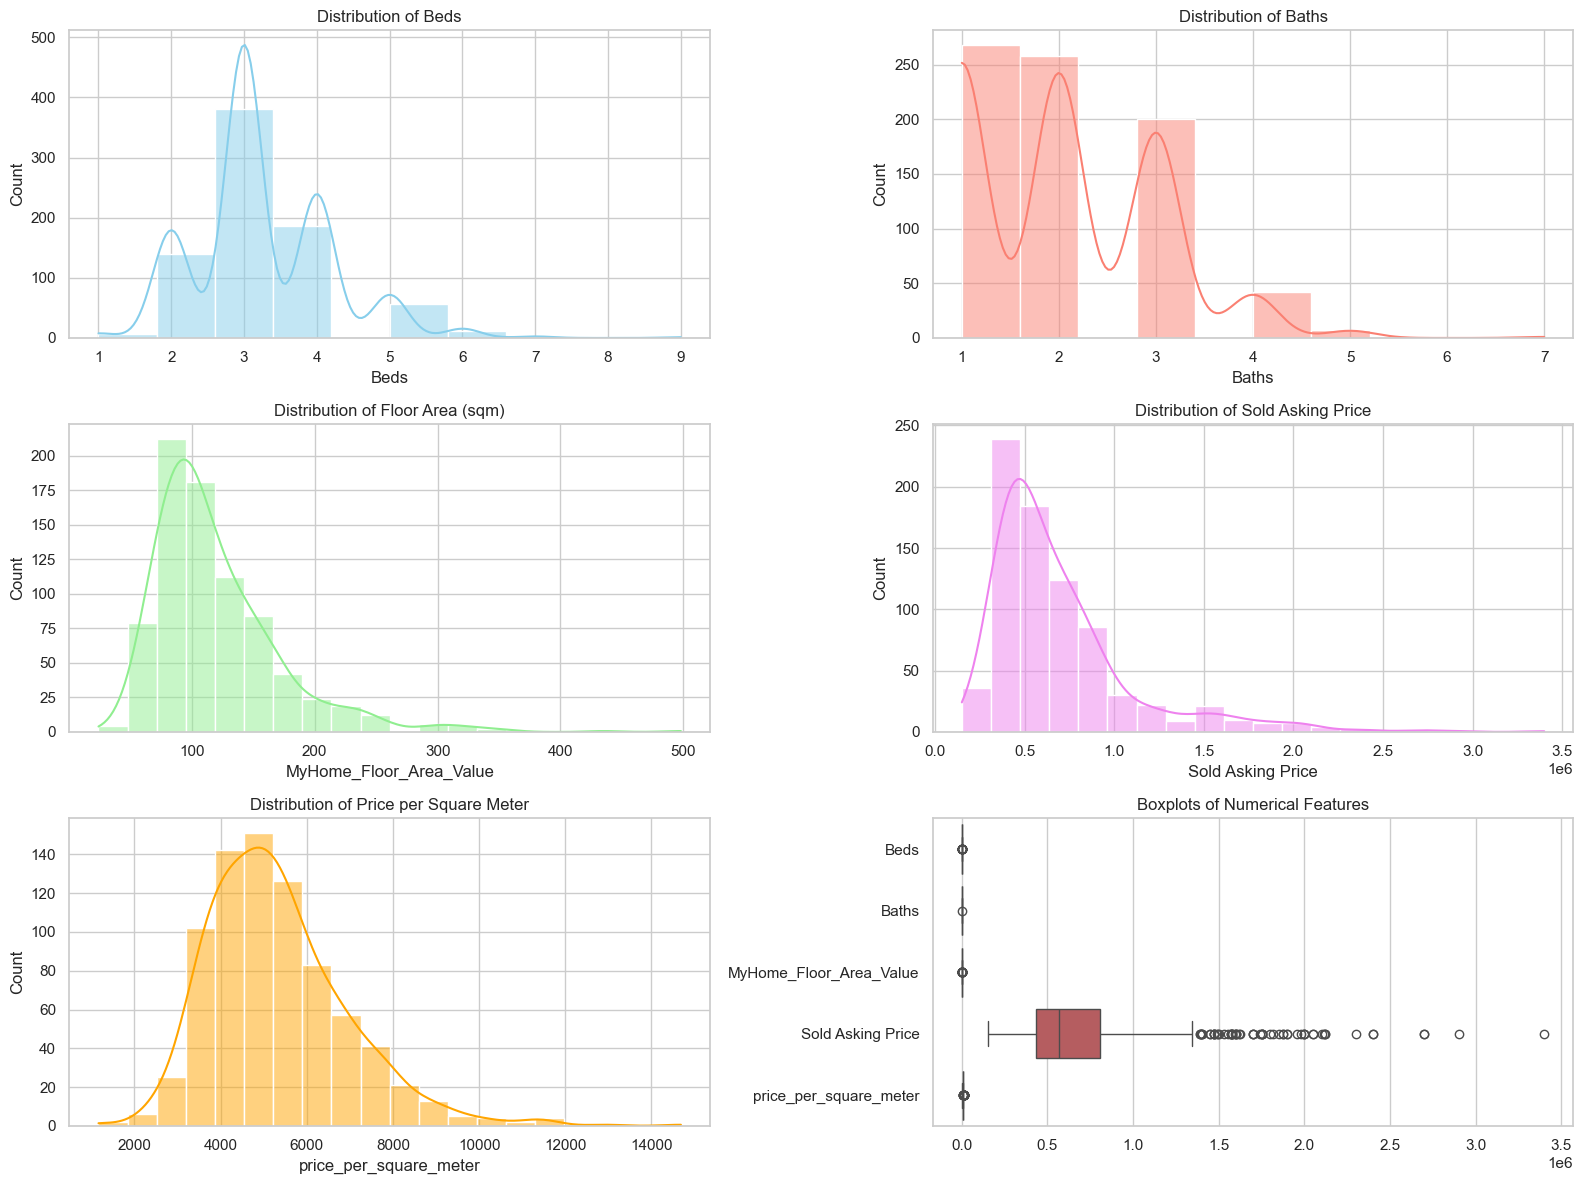

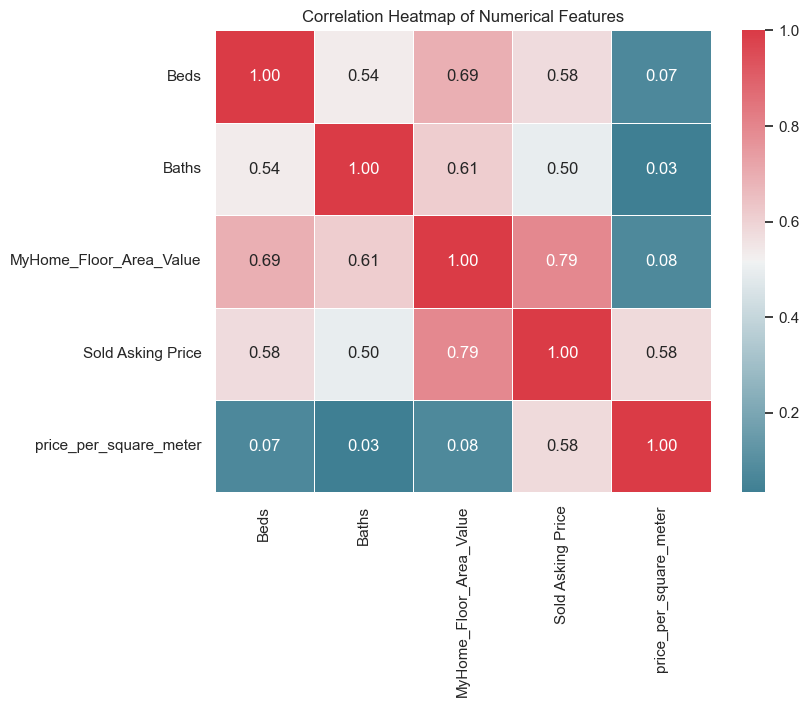

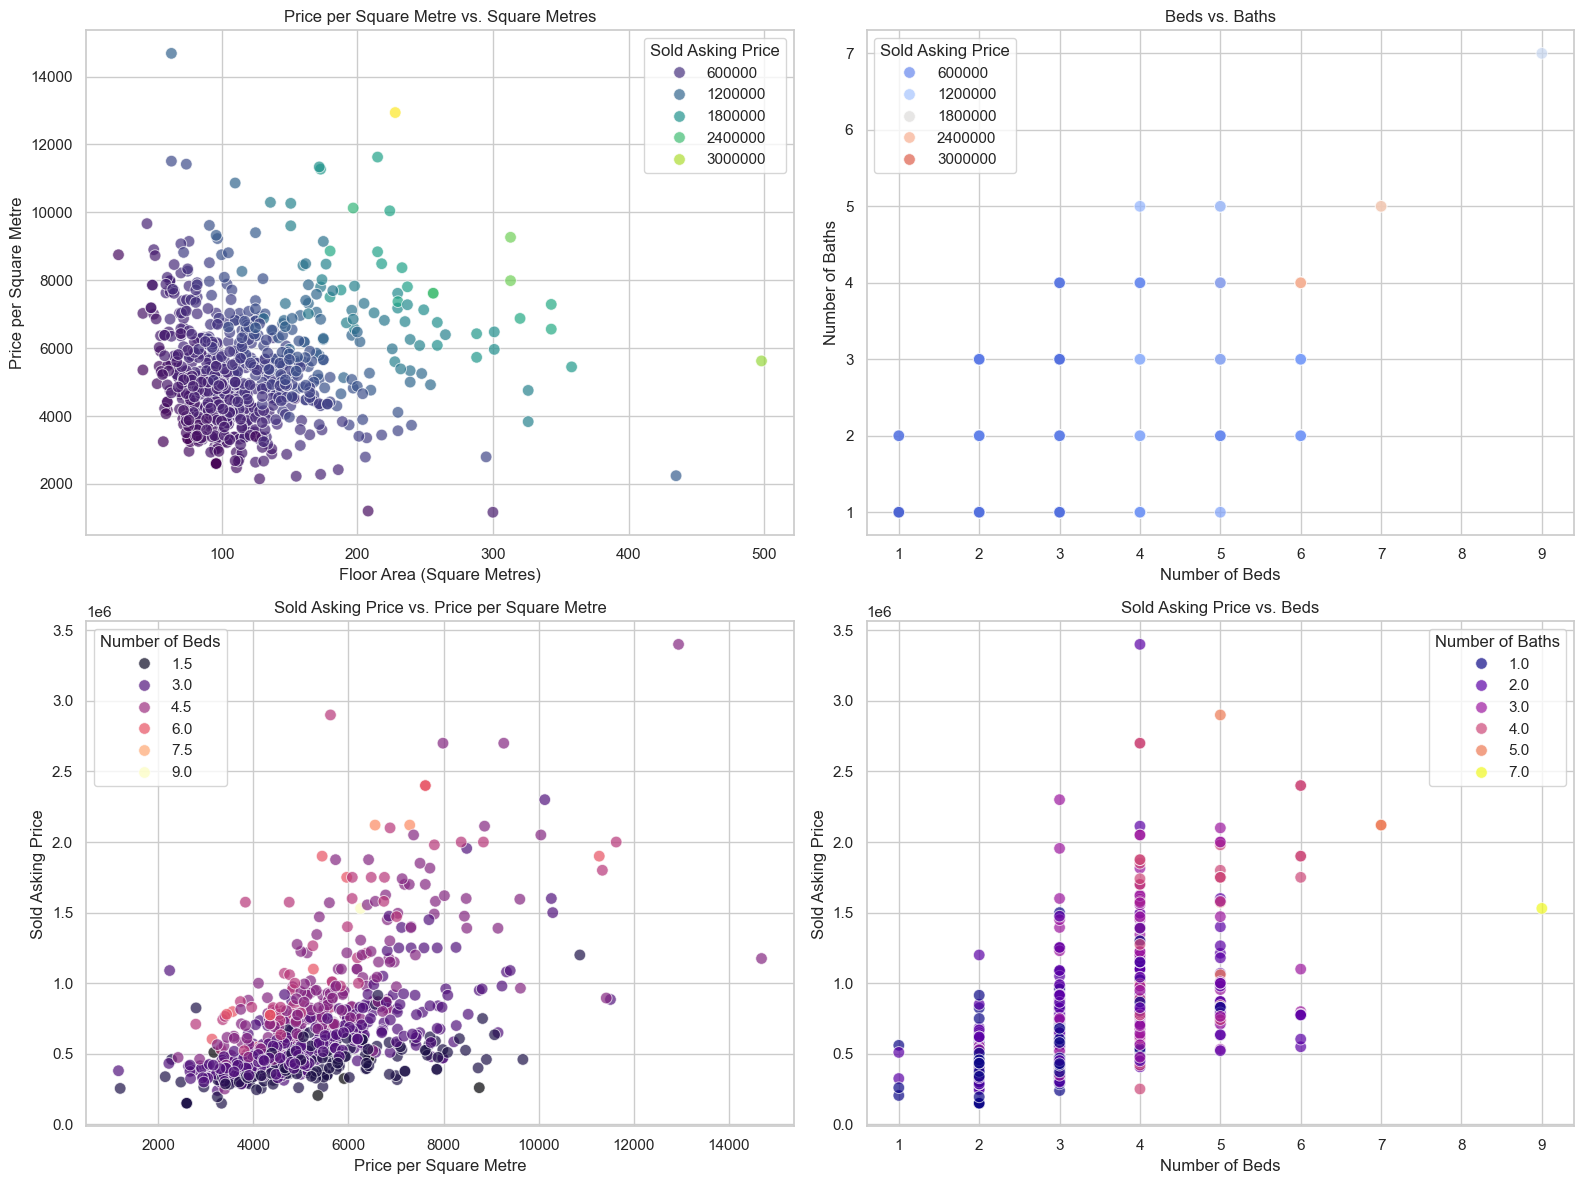

In [57]:
# Optional: Set a seaborn style for better aesthetics
sns.set(style="whitegrid")

# Clean the 'Beds' and 'Baths' columns by extracting numeric values
house_rows['Beds'] = house_rows['Beds'].str.extract('(\d+)').astype(float)
house_rows['Baths'] = house_rows['Baths'].str.extract('(\d+)').astype(float)

# Ensure other numerical features are properly handled (convert non-numeric to NaN)
numerical_features = ['Beds', 'Baths', 'MyHome_Floor_Area_Value', 
                      'Sold Asking Price', 'price_per_square_meter']

# Set up the matplotlib figure for Histograms and Boxplots
plt.figure(figsize=(16, 12))

# 1. Histograms
plt.subplot(3, 2, 1)
sns.histplot(house_rows['Beds'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Beds')

plt.subplot(3, 2, 2)
sns.histplot(house_rows['Baths'], bins=10, kde=True, color='salmon')
plt.title('Distribution of Baths')

plt.subplot(3, 2, 3)
sns.histplot(house_rows['MyHome_Floor_Area_Value'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Floor Area (sqm)')

plt.subplot(3, 2, 4)
sns.histplot(house_rows['Sold Asking Price'], bins=20, kde=True, color='violet')
plt.title('Distribution of Sold Asking Price')

plt.subplot(3, 2, 5)
sns.histplot(house_rows['price_per_square_meter'], bins=20, kde=True, color='orange')
plt.title('Distribution of Price per Square Meter')

# 2. Boxplots
plt.subplot(3, 2, 6)
sns.boxplot(data=house_rows[numerical_features], orient='h')
plt.title('Boxplots of Numerical Features')

plt.tight_layout()
plt.show()

# Correlation Heatmap
# Calculate correlation matrix
corr_matrix = house_rows[numerical_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Additional Scatter Plots Grid
# Set up the matplotlib figure for the scatter plots grid
plt.figure(figsize=(16, 12))

# 1. Price per Square Metre vs. Square Metres
plt.subplot(2, 2, 1)
sns.scatterplot(
    data=house_rows,
    x='MyHome_Floor_Area_Value',
    y='price_per_square_meter',
    hue='Sold Asking Price',
    palette='viridis',
    alpha=0.7,
    edgecolor='w',
    s=70
)
plt.title('Price per Square Metre vs. Square Metres')
plt.xlabel('Floor Area (Square Metres)')
plt.ylabel('Price per Square Metre')
plt.legend(title='Sold Asking Price', loc='best')

# 2. Beds vs. Baths
plt.subplot(2, 2, 2)
sns.scatterplot(
    data=house_rows,
    x='Beds',
    y='Baths',
    hue='Sold Asking Price',
    palette='coolwarm',
    alpha=0.7,
    edgecolor='w',
    s=70
)
plt.title('Beds vs. Baths')
plt.xlabel('Number of Beds')
plt.ylabel('Number of Baths')
plt.legend(title='Sold Asking Price', loc='best')

# 3. Sold Asking Price vs. Price per Square Metre
plt.subplot(2, 2, 3)
sns.scatterplot(
    data=house_rows,
    x='price_per_square_meter',
    y='Sold Asking Price',
    hue='Beds',
    palette='magma',
    alpha=0.7,
    edgecolor='w',
    s=70
)
plt.title('Sold Asking Price vs. Price per Square Metre')
plt.xlabel('Price per Square Metre')
plt.ylabel('Sold Asking Price')
plt.legend(title='Number of Beds', loc='best')

# 4. Sold Asking Price vs. Beds
plt.subplot(2, 2, 4)
sns.scatterplot(
    data=house_rows,
    x='Beds',
    y='Sold Asking Price',
    hue='Baths',
    palette='plasma',
    alpha=0.7,
    edgecolor='w',
    s=70
)
plt.title('Sold Asking Price vs. Beds')
plt.xlabel('Number of Beds')
plt.ylabel('Sold Asking Price')
plt.legend(title='Number of Baths', loc='best')

plt.tight_layout()
plt.show()


In [59]:
import pandas as pd
import numpy as np

# Assuming df = house_rows is already available
# For sold date assume that we just use everything in the dataset for now. 

# Columns for model fitting
columns_subset_training = ['Address', 'Property Type', 'Beds', 'Baths', 'MyHome_Floor_Area_Value', 'Sold Asking Price', 'MyHome_Latitude', 'MyHome_Longitude'] #'Sold Date',

# Subsetting the DataFrame
df_subset = house_rows[columns_subset_training].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Check the updated DataFrame
df_subset.head()


,Address,Property Type,Beds,Baths,MyHome_Floor_Area_Value,Sold Asking Price,MyHome_Latitude,MyHome_Longitude
0,"Taramar, Middle Third, Dublin 5, D05X8N9",End of Terrace,4.0,1.0,142.0,950000.0,53.373857,-6.203371
1,"87 Haddington Road, Dublin 4, D04WP23",Terrace,5.0,3.0,175.0,1010000.0,53.335385,-6.239842
3,"7 Parkside Heath, Clongriffin, Dublin 13, Dubl...",Terrace,3.0,3.0,113.0,569000.0,53.407653,-6.163418
4,"5 Herbert Road, Blanchardstown, Blanchardstown...",Bungalow,2.0,1.0,116.0,432200.0,53.387605,-6.374562
6,"31 Tibradden Grove, Dublin 12, D12P2X4",Terrace,3.0,1.0,106.0,390000.0,53.308228,-6.341920


In [67]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

# --------------------------------------------
# 1. Data Preparation
# --------------------------------------------

# Assuming `house_rows` DataFrame is already available
# If not, you can load it using pd.read_csv or other relevant methods
# Example:
# house_rows = pd.read_csv('your_data.csv')

# Define the columns to use for model fitting
columns_subset_training = [
    'Address', 
    'Property Type', 
    'Beds', 
    'Baths', 
    'MyHome_Floor_Area_Value', 
    'Sold Asking Price', 
    'MyHome_Latitude', 
    'MyHome_Longitude'
]

# Subset the DataFrame
df_subset = house_rows[columns_subset_training].copy()

# Ensure 'Beds' and 'Baths' are treated as strings before extracting numeric values
df_subset['Beds'] = df_subset['Beds'].astype(str).str.extract('(\d+)').astype(float)
df_subset['Baths'] = df_subset['Baths'].astype(str).str.extract('(\d+)').astype(float)


# Convert other relevant columns to numeric, if not already
numeric_columns = ['MyHome_Floor_Area_Value', 'Sold Asking Price', 
                   'MyHome_Latitude', 'MyHome_Longitude']
for col in numeric_columns:
    df_subset[col] = pd.to_numeric(df_subset[col], errors='coerce')

# Drop rows with missing values in critical columns
df_subset.dropna(subset=['Beds', 'Baths', 'MyHome_Floor_Area_Value', 
                         'MyHome_Latitude', 'MyHome_Longitude'], inplace=True)

# Optional: Reset index after dropping rows
df_subset.reset_index(drop=True, inplace=True)

# --------------------------------------------
# 2. Define Helper Functions
# --------------------------------------------

def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the Haversine distance between two points on the Earth.
    """
    R = 6371  # Earth radius in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])  # Convert to radians
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

def min_max_scale(feature):
    """
    Perform Min-Max scaling on a feature.
    """
    min_val = feature.min()
    max_val = feature.max()
    if max_val - min_val == 0:
        return feature - min_val  # Avoid division by zero
    return (feature - min_val) / (max_val - min_val)

def calculate_combined_score(df_subset, given_lat, given_lon, given_beds, 
                            given_baths, given_size, geo_weight=0.7, 
                            size_weight=1.0, beds_baths_weight=0.5, 
                            max_distance_km=3):
    """
    Calculate a combined score based on geographic distance and feature similarity.
    
    Parameters:
    - df_subset: DataFrame with property data.
    - given_lat, given_lon: Latitude and Longitude of the target property.
    - given_beds, given_baths, given_size: Features of the target property.
    - geo_weight: Weight for geographic distance.
    - size_weight: Weight for the size feature.
    - beds_baths_weight: Weight for beds and baths features.
    - max_distance_km: Maximum geographic distance to consider.
    
    Returns:
    - df_sorted: DataFrame sorted by the combined score.
    """
    # Calculate Haversine distance for each property
    df_subset['Geo Distance (km)'] = df_subset.apply(
        lambda row: haversine_distance(given_lat, given_lon, 
                                       row['MyHome_Latitude'], 
                                       row['MyHome_Longitude']), axis=1)
    
    # Filter properties within the specified geographic distance
    df_filtered = df_subset[df_subset['Geo Distance (km)'] <= max_distance_km].copy()
    
    if df_filtered.empty:
        print("No properties found within the specified geographic distance.")
        return df_filtered
    
    # Prepare KNN features
    knn_features = df_filtered[['MyHome_Floor_Area_Value', 'Beds', 'Baths']].copy()
    
    # Apply Min-Max scaling and weights
    knn_features_scaled = pd.DataFrame()
    knn_features_scaled['MyHome_Floor_Area_Value'] = min_max_scale(knn_features['MyHome_Floor_Area_Value']) * size_weight
    knn_features_scaled['Beds'] = min_max_scale(knn_features['Beds']) * beds_baths_weight
    knn_features_scaled['Baths'] = min_max_scale(knn_features['Baths']) * beds_baths_weight
    
    # Scale the target features using the same min and max as the dataset
    def scale_feature(value, feature_series, weight):
        min_val = feature_series.min()
        max_val = feature_series.max()
        if max_val - min_val == 0:
            scaled = 0.0
        else:
            scaled = (value - min_val) / (max_val - min_val)
        return scaled * weight
    
    target_scaled = np.array([
        scale_feature(given_size, knn_features['MyHome_Floor_Area_Value'], size_weight),
        scale_feature(given_beds, knn_features['Beds'], beds_baths_weight),
        scale_feature(given_baths, knn_features['Baths'], beds_baths_weight)
    ]).reshape(1, -1)
    
    # Initialize NearestNeighbors with Euclidean distance
    nbrs = NearestNeighbors(n_neighbors=len(knn_features_scaled), 
                            algorithm='auto', metric='euclidean')
    nbrs.fit(knn_features_scaled)
    
    # Find distances from the target to all properties
    knn_distances, _ = nbrs.kneighbors(target_scaled)
    
    # Assign the KNN distances to the dataframe
    df_filtered['KNN Distance'] = knn_distances.flatten()
    
    # Normalize both Geo Distance and KNN Distance using Min-Max Scaling
    df_filtered['Geo Distance (km)_scaled'] = min_max_scale(df_filtered['Geo Distance (km)'])
    df_filtered['KNN Distance_scaled'] = min_max_scale(df_filtered['KNN Distance'])
    
    # Combine the scaled distances using the specified weights
    df_filtered['Combined Score'] = (
        geo_weight * df_filtered['Geo Distance (km)_scaled'] + 
        (1 - geo_weight) * df_filtered['KNN Distance_scaled']
    )
    
    # Sort by the combined score in ascending order (lower is better)
    df_sorted = df_filtered.sort_values(by='Combined Score').reset_index(drop=True)
    
    return df_sorted

# --------------------------------------------
# 3. Execute Scoring
# --------------------------------------------

# Define the given property details
given_property = {
    'latitude': 53.279690,   # Example latitude (Blackrock DART station)
    'longitude': -6.181159,  # Example longitude (Blackrock DART station)
    'beds': 1.0,             # Number of beds
    'baths': 1.0,            # Number of baths
    'size': 100.0            # Size in square meters
}

# Define weights
geo_weight = 0.5        # 70% weight for Geo Distance
size_weight = 1.0       # Weight for size feature
beds_baths_weight = 0.5 # Weight for beds and baths features

# Maximum distance to consider (in kilometers)
max_distance_km = 3

# Calculate the combined score
df_sorted = calculate_combined_score(
    df_subset=df_subset,
    given_lat=given_property['latitude'],
    given_lon=given_property['longitude'],
    given_beds=given_property['beds'],
    given_baths=given_property['baths'],
    given_size=given_property['size'],
    geo_weight=geo_weight,
    size_weight=size_weight,
    beds_baths_weight=beds_baths_weight,
    max_distance_km=max_distance_km
)

# Check if df_sorted is not empty before proceeding
if not df_sorted.empty:
    # Display the top 20 rows of the sorted DataFrame
    print("Top 20 Properties Based on Combined Score:")
    display_columns = [
        'Address', 'Property Type', 'Beds', 'Baths', 
        'MyHome_Floor_Area_Value', 'Sold Asking Price', 
        'MyHome_Latitude', 'MyHome_Longitude', 
        'Geo Distance (km)', 'KNN Distance', 'Combined Score'
    ]
    df_sorted[display_columns].head(20)
else:
    print("No properties match the criteria within the specified distance.")


df_sorted[display_columns].head(20)

Top 20 Properties Based on Combined Score:


/Users/johnmcenroe/Documents/programming_misc/real_estate/env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,Address,Property Type,Beds,Baths,MyHome_Floor_Area_Value,Sold Asking Price,MyHome_Latitude,MyHome_Longitude,Geo Distance (km),KNN Distance,Combined Score
0,"30 Pine Court, Blackrock, Co. Dublin, A94K228",Detached,4.0,3.0,151.0,910000.0,53.283864,-6.177403,0.527000,0.248909,0.076521
1,"Ruane, Newtownpark Avenue, Blackrock, Co. Dubl...",Detached,5.0,2.0,246.0,1600000.0,53.282513,-6.179218,0.339423,0.334237,0.095607
2,"27 Fairyhill Blackrock, Blackrock, Co. Dublin,...",Bungalow,4.0,2.0,204.0,880000.0,53.286823,-6.178921,0.807014,0.197878,0.096749
3,"8 Laurleen, Leopardstown, Dublin 18, A94D284",Detached,5.0,3.0,167.8,850000.0,53.279114,-6.191913,0.717864,0.241086,0.107514
4,"9 Avonmore, Foxrock, Dublin 18, D18R9W4",Detached,4.0,3.0,190.0,1215000.0,53.275677,-6.186567,0.573048,0.333504,0.139186
5,"9 Pine Court, Newtownpark Avenue, Co Dublin, A...",Semi-D,4.0,3.0,138.0,875000.0,53.286398,-6.176664,0.803476,0.333717,0.182766
6,"Ard Nua Newtownpark Avenue Blackrock, Blackroc...",Semi-D,5.0,2.0,125.0,871000.0,53.286398,-6.176664,0.803476,0.333856,0.182854
7,"18 Foxrock Green, Foxrock, Dublin 18, D18W9T2",Terrace,3.0,3.0,93.0,677500.0,53.275471,-6.172971,0.718631,0.372764,0.191686
8,"31 Newtown Park, Blackrock, Co. Dublin, A94D6V6",Semi-D,4.0,1.0,110.0,822000.0,53.287447,-6.178787,0.876822,0.376862,0.224126
9,"8 Beech Park Avenue, Foxrock, Foxrock, Dublin 18",Semi-D,5.0,2.0,147.5,830000.0,53.275426,-6.166777,1.067335,0.336772,0.234461


/var/folders/bh/0yjbpqfx48z2xb12qyt9nn640000gn/T/ipykernel_23019/4210511878.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Property Type', y='KNN Distance', data=df_sorted, ax=axes[2, 0], palette=dict(zip(property_type_counts.index, colors)))
/var/folders/bh/0yjbpqfx48z2xb12qyt9nn640000gn/T/ipykernel_23019/4210511878.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=45)


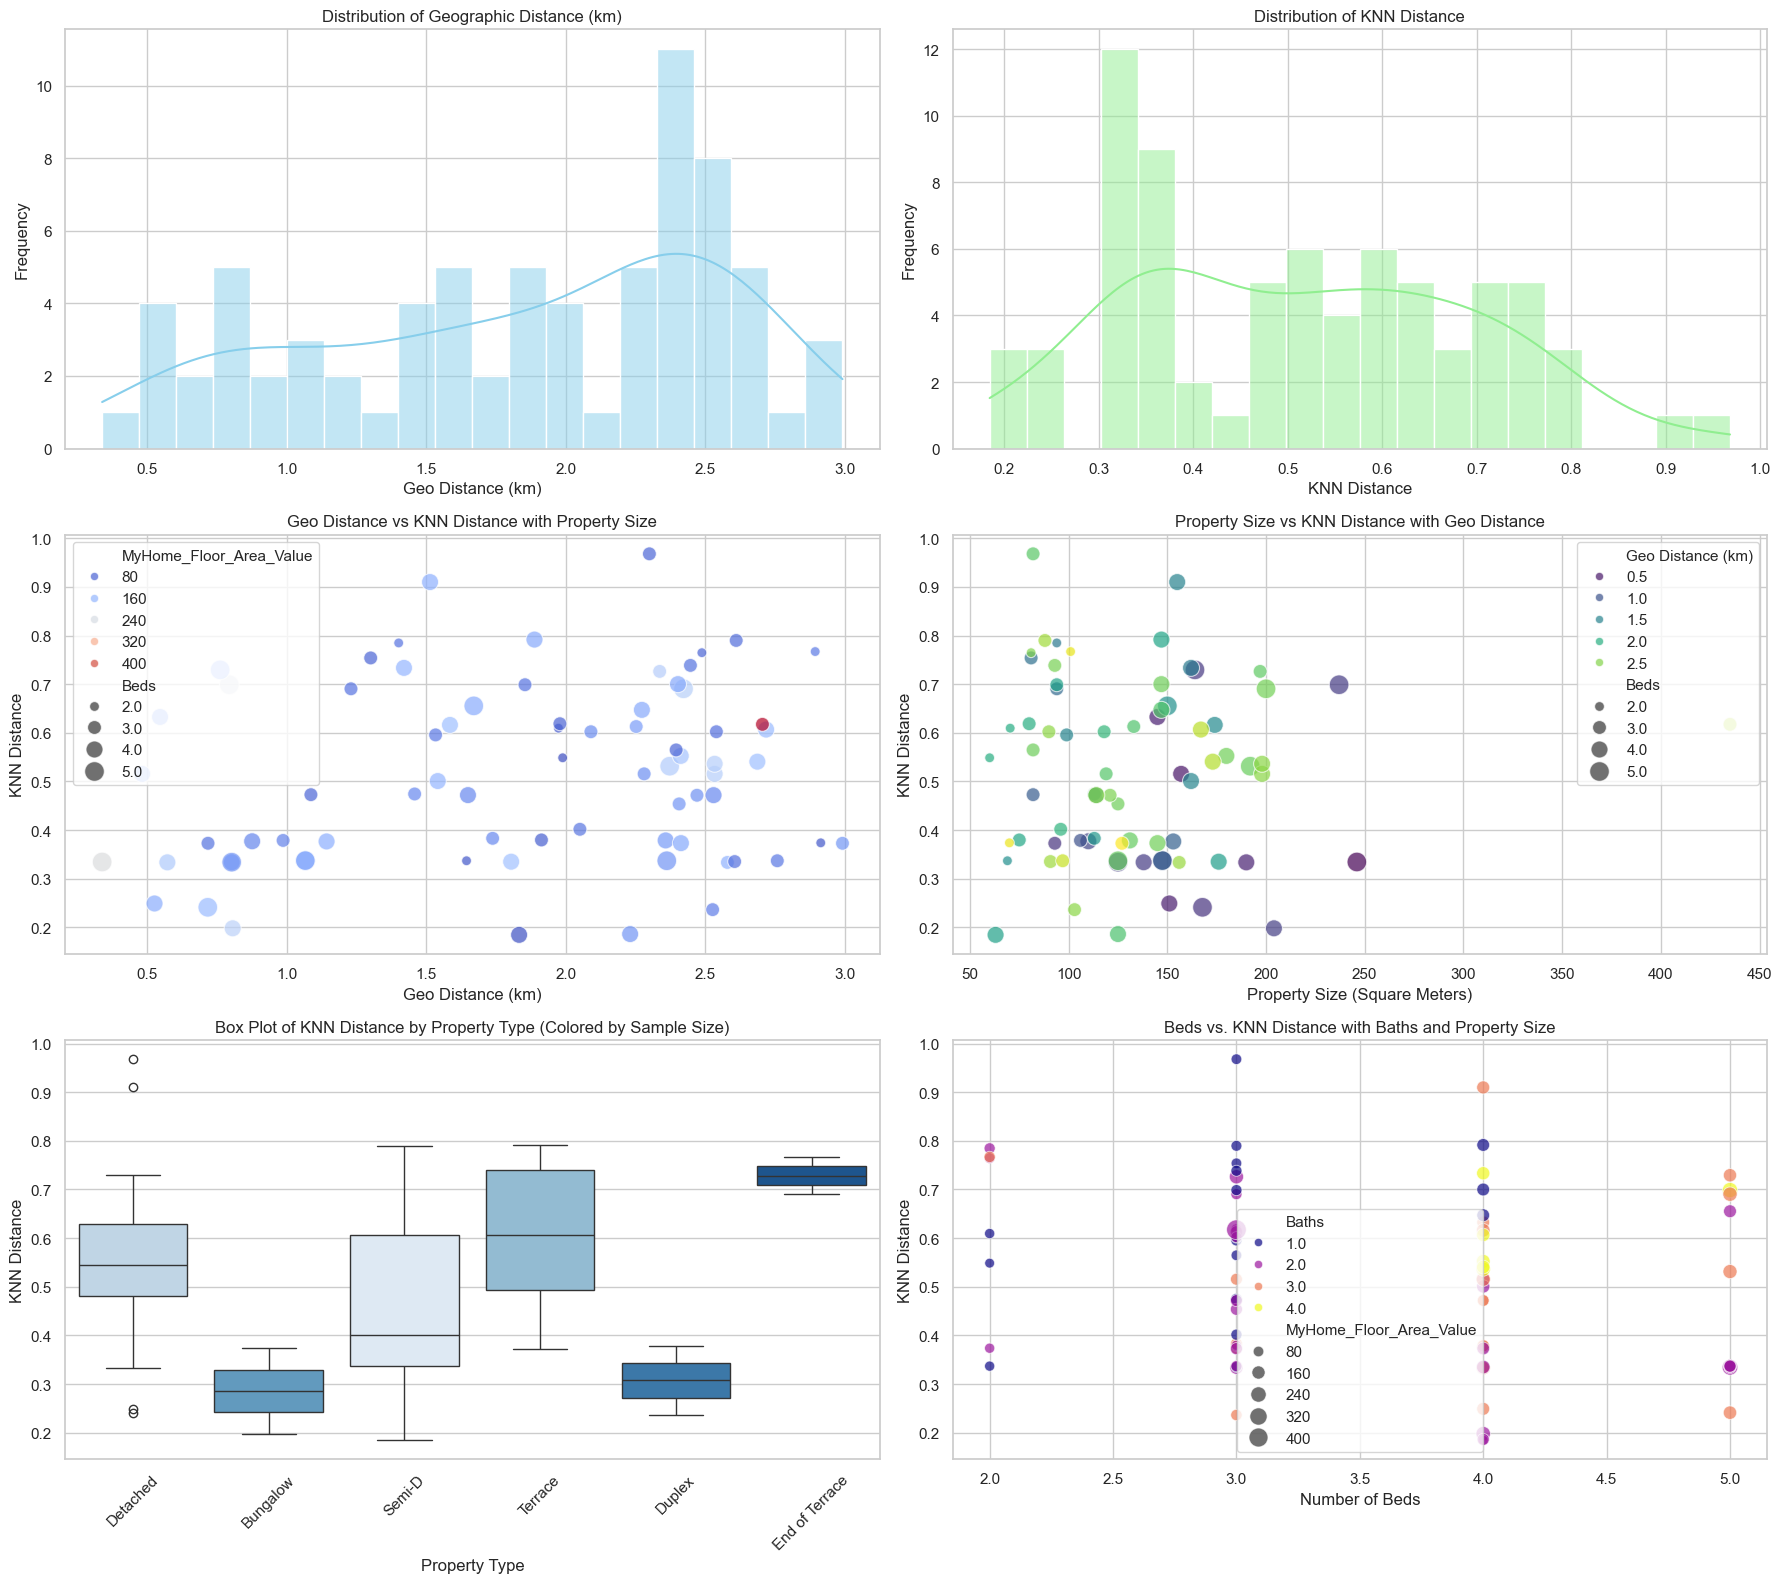

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create a grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 16))

# 1. Geographic Distance Distribution
sns.histplot(df_sorted['Geo Distance (km)'], bins=20, color='skyblue', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Geographic Distance (km)')
axes[0, 0].set_xlabel('Geo Distance (km)')
axes[0, 0].set_ylabel('Frequency')

# 2. KNN Distance Distribution
sns.histplot(df_sorted['KNN Distance'], bins=20, color='lightgreen', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of KNN Distance')
axes[0, 1].set_xlabel('KNN Distance')
axes[0, 1].set_ylabel('Frequency')

# 3. Scatter Plot: Geo Distance vs KNN Distance
sns.scatterplot(x='Geo Distance (km)', y='KNN Distance', data=df_sorted, hue='MyHome_Floor_Area_Value', palette='coolwarm', size='Beds', sizes=(50, 200), alpha=0.7, ax=axes[1, 0])
axes[1, 0].set_title('Geo Distance vs KNN Distance with Property Size')
axes[1, 0].set_xlabel('Geo Distance (km)')
axes[1, 0].set_ylabel('KNN Distance')

# 4. Scatter Plot: Property Size vs KNN Distance
sns.scatterplot(x='MyHome_Floor_Area_Value', y='KNN Distance', data=df_sorted, hue='Geo Distance (km)', palette='viridis', size='Beds', sizes=(50, 200), alpha=0.7, ax=axes[1, 1])
axes[1, 1].set_title('Property Size vs KNN Distance with Geo Distance')
axes[1, 1].set_xlabel('Property Size (Square Meters)')
axes[1, 1].set_ylabel('KNN Distance')

# 5. Box Plot: KNN Distance by Property Type with color based on sample size
property_type_counts = df_sorted['Property Type'].value_counts()
colors = sns.color_palette("Blues", len(property_type_counts))

sns.boxplot(x='Property Type', y='KNN Distance', data=df_sorted, ax=axes[2, 0], palette=dict(zip(property_type_counts.index, colors)))
axes[2, 0].set_title('Box Plot of KNN Distance by Property Type (Colored by Sample Size)')
axes[2, 0].set_xlabel('Property Type')
axes[2, 0].set_ylabel('KNN Distance')
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=45)

# 6. Scatter Plot: Beds vs. KNN Distance
sns.scatterplot(x='Beds', y='KNN Distance', data=df_sorted, hue='Baths', palette='plasma', size='MyHome_Floor_Area_Value', sizes=(50, 200), alpha=0.7, ax=axes[2, 1])
axes[2, 1].set_title('Beds vs. KNN Distance with Baths and Property Size')
axes[2, 1].set_xlabel('Number of Beds')
axes[2, 1].set_ylabel('KNN Distance')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [12]:
# Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt

def analyze_top_n_prices(df, N):
    """
    Analyzes the top N rows of a DataFrame and returns the 25th percentile, median, and 75th percentile
    of the 'Sold Asking Price'. Also plots these statistics.

    Parameters:
    df (pd.DataFrame): The sorted DataFrame.
    N (int): Number of top rows to analyze.

    Returns:
    pd.DataFrame: A DataFrame with the statistics.
    """
    # Validate Input Parameters
    if not isinstance(df, pd.DataFrame):
        raise TypeError("The 'df' parameter must be a pandas DataFrame.")
    if 'Sold Asking Price' not in df.columns:
        raise ValueError("The DataFrame must contain a 'Sold Asking Price' column.")
    if not isinstance(N, int) or N <= 0:
        raise ValueError("The 'N' parameter must be a positive integer.")

    # Select the top N rows
    top_n = df.head(N)

    # Check if there are enough rows
    if top_n.empty:
        print(f"The DataFrame is empty. No data to analyze for top {N} properties.")
        return pd.DataFrame()

    # Calculate the percentiles
    percentiles = top_n['Sold Asking Price'].quantile([0.25, 0.5, 0.75]).rename(index={
        0.25: '25th Percentile',
        0.5: 'Median',
        0.75: '75th Percentile'
        
    })

    # Create a summary DataFrame
    summary_df = pd.DataFrame({
        'Statistic': ['25th Percentile', 'Median', '75th Percentile'],
        'Sold Asking Price (EUR)': [
            percentiles['25th Percentile'], 
            percentiles['Median'], 
            percentiles['75th Percentile']
        ]
    })

    # Print the summary
    print(f"Sold Asking Price Statistics for Top {N} Properties:")
    display(summary_df)

    return summary_df
    # Call the analyze_top_n_prices function
price_summary = analyze_top_n_prices(df_sorted, 20)


Sold Asking Price Statistics for Top 20 Properties:


,Statistic,Sold Asking Price (EUR)
0,25th Percentile,815250.0
1,Median,873000.0
2,75th Percentile,941250.0
